# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# Your code here
financial = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [41]:
financial.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

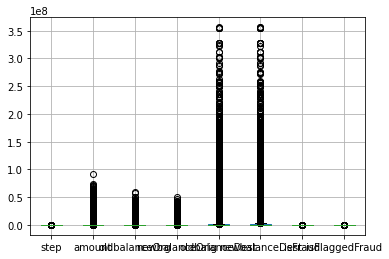

In [43]:
financial.boxplot()

<AxesSubplot:>

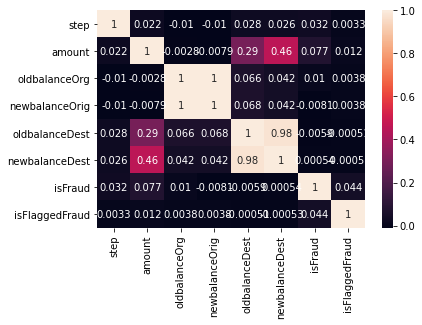

In [44]:
sns.heatmap(financial.corr(), annot=True)

In [37]:
# the range of the data is huge.

#col_list = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
#for column in col_list:
    #financial[column+'_norm'] = np.where(financial[column] == 0, 0, np.log10(financial[column]))

/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/Cellar/jupyterlab/2.2.2/libexec/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inp

In [87]:
financial.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

### What is the distribution of the outcome? 

(array([6.362604e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.600000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

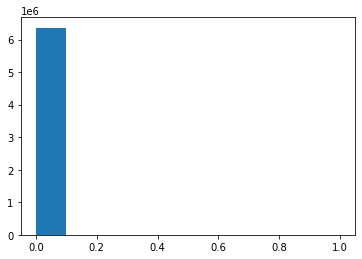

In [52]:
# Your response here
plt.hist(financial['isFlaggedFraud'])

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [74]:
#Attempt: 1
#financial['date'] = pd.date_range( start='1/10/2020 00:00:00', end='19/12/2020 00:29:10', periods = financial.shape[0])

#pd.to_datetime(financial['date'], format='%H:%M:%S')

#financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,date
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,2020-01-10 00:00:00.000000000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2020-01-10 00:00:04.671558991
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,2020-01-10 00:00:09.343117983
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,2020-01-10 00:00:14.014676975
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,2020-01-10 00:00:18.686235966
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,2020-12-19 00:28:51.313764036
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,2020-12-19 00:28:55.985323028
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,2020-12-19 00:29:00.656882020
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,2020-12-19 00:29:05.328441012


In [128]:
import datetime
start = datetime.datetime(2020, 1, 1, 0,00)
financial['date'] = financial.apply(lambda x: start + datetime.timedelta(hours=x['step']), axis=1)

financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,date
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,2020-01-01 01:00:00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2020-01-01 01:00:00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,2020-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,2020-01-01 01:00:00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,2020-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,2020-01-31 23:00:00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,2020-01-31 23:00:00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,2020-01-31 23:00:00
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,2020-01-31 23:00:00


### Run a logisitc regression classifier and evaluate its accuracy.

In [129]:
financial = pd.get_dummies(data=financial, columns=['type'], drop_first=True)

In [125]:
financial.dtypes

step                       int64
amount                   float64
nameOrig                  object
oldbalanceOrg            float64
newbalanceOrig           float64
nameDest                  object
oldbalanceDest           float64
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
date              datetime64[ns]
type_CASH_OUT              uint8
type_DEBIT                 uint8
type_PAYMENT               uint8
type_TRANSFER              uint8
dtype: object

In [168]:
# Your code here
X = financial.drop(columns=['nameOrig' , 'nameDest', 'date','isFlaggedFraud', 'step', 'isFraud'])
y = financial['isFlaggedFraud']


In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

In [170]:
model = LogisticRegression().fit(X_train, y_train)

In [171]:
y_predict = model.predict(X_test)

y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
#Is it correct? 

from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_predict)

0.9999976424806133

### Now pick a model of your choice and evaluate its accuracy.

In [148]:
# Your code here
# Class count
count_class_0, count_class_1 = financial.isFlaggedFraud.value_counts()

# Divide by class
df_class_0 = financial[financial['isFlaggedFraud'] == 0]
df_class_1 = financial[financial['isFlaggedFraud']== 1]

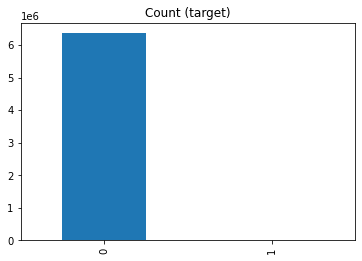

In [146]:
target_count.plot(kind='bar', title='Count (target)');

In [160]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


In [163]:
print('Random under-sampling:')
print(df_test_under.isFlaggedFraud.value_counts())


Random under-sampling:
1    16
0    16
Name: isFlaggedFraud, dtype: int64


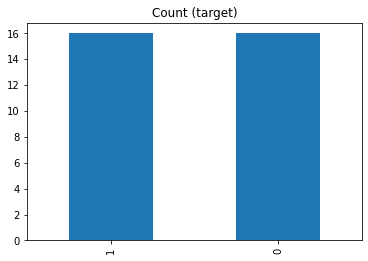

In [173]:
df_test_under.isFlaggedFraud.value_counts().plot(kind='bar', title='Count (target)');

In [174]:
# Your code here
X_Undersampled = df_test_under.drop(columns=['nameOrig' , 'nameDest', 'date','isFlaggedFraud', 'step', 'isFraud'])
y_Undersampled = df_test_under['isFlaggedFraud']


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train_Undersampled, X_test_Undersampled, y_train_Undersampled, y_test_Undersampled = train_test_split(X_Undersampled, y_Undersampled, test_size = 0.2, random_state=42 )

In [177]:
model = LogisticRegression().fit(X_train_Undersampled, y_train_Undersampled)

In [178]:
y_predict_Undersampled = model.predict(X_test_Undersampled)

y_predict_Undersampled

array([1, 1, 1, 1, 1, 0, 1])

In [179]:
accuracy_score(y_test_Undersampled, y_predict_Undersampled)

0.7142857142857143

### Which model worked better and how do you know?

In [ ]:
# Your response here

# Once the data are undersampled, the Logistic regression model based on the undersampled result is a better fit 
#or at least more correct.

In [152]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install imblearn


     |████████████████████████████████| 167 kB 1.1 MB/s eta 0:00:01
